In [94]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker
from google.cloud import bigquery
import os
from google.cloud import bigquery

from datetime import timedelta
import warnings


# pd.set_option('display.max_columns', None)

os.chdir('/home/jupyter')
!pwd
# # %cd 
# !pwd
# (base) jupyter@starfire-1:~$ pip install jupyter-console
# (base) jupyter@starfire-1:~$ !jupyter console --existing
%connect_info



/home/jupyter
{
  "shell_port": 39319,
  "iopub_port": 56531,
  "stdin_port": 57035,
  "control_port": 44055,
  "hb_port": 33023,
  "ip": "127.0.0.1",
  "key": "46ee66e9-eb7cc30d1d3ce65dc992a78e",
  "transport": "tcp",
  "signature_scheme": "hmac-sha256",
  "kernel_name": "conda-root-py",
  "jupyter_session": "/home/jupyter/starfire/notebooks/refinitiv_mna_deals-2.ipynb"
}

Paste the above JSON into a file, and connect with:
    $> jupyter <app> --existing <file>
or, if you are local, you can connect with just:
    $> jupyter <app> --existing kernel-868c1039-e3b4-45fc-bebd-e72a6810f6cc.json
or even just:
    $> jupyter <app> --existing
if this is the most recent Jupyter kernel you have started.


In [95]:
# RDP_LOGIN = '<RDP Machine ID>'
# RDP_PASSWORD = '<RDP Password>'
# APP_KEY = '<APP Key>'
from IPython.display import HTML

import refinitiv.dataplatform as rdp

%run ./starfire/notebooks/credentials.ipynb

session = rdp.open_platform_session(
    APP_KEY,
    rdp.GrantPassword(
        username = RDP_LOGIN,
        password = RDP_PASSWORD
    )
)

# https://developers.lseg.com/en/article-catalog/article/getting-start-with-refinitiv-data-platform

In [29]:
# Download Deals data

master_df = pd.DataFrame()


from datetime import datetime, timedelta

# Initial start date
start_date = datetime.strptime('20180101', '%Y%m%d')

# Define the interval (15 days)
interval = timedelta(days=5)

# Initialize an empty list to store the date ranges
date_ranges = []

# Loop to create date intervals
for _ in range(10000):  # Adjust the range to get the desired number of intervals
    end_date = start_date + interval
    date_ranges.append((start_date.strftime('%Y%m%d'), end_date.strftime('%Y%m%d')))
    start_date = end_date + timedelta(days=1)

# Print the date ranges
for start, end in date_ranges:
    success = False
    while not success:
        try:
            print(f"Start Date: {start}, End Date: {end}")

            print("Downloading data from refinitiv...")

            mna_screen = f'SCREEN(U(IN(DEALS)/*UNV:DEALSMNA*/),\
                        BETWEEN(TR.MnAAnnDate,{start},{end})/*dt:Date*/, \
                        CURN=USD)'


            # input ipo screen results as instrument list and pull ipo attributes via fields from Eikon Data API. 
            mnas = rdp.get_data(mna_screen,['TR.MNASDCDealNumber',
                                            'TR.MnAAnnDate', 'TR.MnARankValueIncNetDebt(Curn=USD,Scale=6)',
                                            'TR.MnATarget', 'TR.MnATargetPermId',
                                            'TR.MnATargetPriTickerSym',
                                            'TR.MnATargetNation',
                                            'TR.MnATargetMacroInd',
                                            'TR.MnATargetMidInd',
                                            'TR.MnAAcquiror',
                                            'TR.MnAAcquirorPermId',
                                            'TR.MnAAcquirorMacroInd',
                                            'TR.MnAAcquirorMidInd',
                                            'TR.MnAAcquirorNation',
                                            'TR.MNADealId','TR.MnASynopsis',
                                            'TR.MnAAcquirorPriHiTech',
                                            'TR.MnAAcquirorPriTickerSym',
                                            'TR.MnAAcquirorExchTicker(Concat="|")',
                                            'TR.MnAAcquirorUltParentPermID',
                                            'TR.MnAHiTechGroup(Concat="|")',
                                            'TR.MnaAcquirorDate1DayPriorToAnn',
                                            'TR.MnaAcquirorStockPrice1DayPriorToAnnInAcqCurr(Curn=USD),
                                            'TR.MnAAcquirorStockPriceOnAnn(Curn=USD)',
                                            'TR.MnAAcquirorStockPrice1DayPostAnn(Curn=USD)',
                                            'TR.MnASnP5001DayPreAnn',
                                            'TR.MnASnP500AtAnnouncement',
                                            'TR.MnASnP5001DayPostAnn',
                                            'TR.MnATargetSDCCusip',
                                            'TR.MnAAcquirorSDCCusip',
                                            'TR.MnAAcquirorUltParentSDCCusip',
                                            'TR.MnAValueOfCash(Curn=USD, Scale=6)',
                                            'TR.MnAValueOfEarnout(Curn=USD, Scale=6)',
                                            'TR.MnADealValue(Curn=USD, Scale=6)',
                                            'TR.MnAAcquirorHiTech(Concat="|")',
                                            'TR.MnAAcquirorUltParentHiTech(Concat="|")',
                                            'TR.MnATargetPriHiTech',
                                            'TR.MnAAcquirorMajorInd',
                                            'TR.MnAAcquirorMajorIndGrp',
                                            'TR.MnAAcquirorPriVEIC',
                                            'TR.MnAMasterDealType',
                                            'TR.MnADealType',
                                            'TR.MnAType(Concat="|")',
                                            'TR.MnAAcquirorVeic(Concat="|")',
                                            'TR.MnAPurposeDescription',
                                            'TR.MnAIsCrossBorder',
                                            'TR.MnAAcquirorIsVentureFirm',
                                            'TR.MnATargetPriVEIC',
                                            'TR.MnATargetVeic(Concat="|")',
                                            'TR.MnAAcquirorBusDesc',
                                            'TR.MnATargetBusDesc',
                                            'TR.MnATargetExchTicker(Concat="|")',
                                            'TR.MnATargetUltParentSDCCusip',
                                            'TR.MnATargetUltParentPriTickerSym',
                                            'TR.MnATargetUltParentPermID',
                                            'TR.MnAAcquirorUltParentPriTickerSym',
                                            'TR.MnAAcquirorUltParentExchTicker(Concat="|")',
                                            'TR.MnATargetUltParentExchTicker(Concat="|")',
                                            'TR.MnATargetMajorInd',
                                            'TR.MnATargetMajorIndGrp',
                                            'TR.MnATargetHiTech(Concat="|")',
                                            'TR.MnAAcquirorUltParentPriHiTech',
                                            'TR.MnAAcquirorHiTechGroup(Concat="|")',
                                            'TR.MnATargetHiTechGroup(Concat="|")',
                                            'TR.MnAWithdrawnDate',
                                            'TR.MnADateUnconditional',
                                            'TR.MnAOrigAnnDate',
                                            'TR.MnAPercentCash',
                                            'TR.MnADealCurrency',
                                            'TR.MnAEarnoutDesc']) 

            print(mnas.shape)

#             print("Uploading data to BQ...")
#             mnas.columns = [col[3:].lower() for col in mnas.columns]

#             # Load the DataFrame into BigQuery
#             load_job = client.load_table_from_dataframe(mnas, table_ref, job_config=job_config)

#             # Wait for the load job to complete
#             load_job.result()

#             print("Data appended successfully.")

            master_df = pd.concat([master_df, mnas], ignore_index=True)
            print(f'Master shape: {master_df.shape}')
            print(master_df['TR.MNASDCDealNumber'])

            success = True 
            
        except Exception as e:
            print(f"An error occurred: {e}. Retrying for the range {start} to {end}...")

Start Date: 20180101, End Date: 20180106
(978, 74)
Master shape: (978, 74)
    TR.MNASDCDealNumber TR.MNASDCDealNumber
0            2696976040          2696976040
1            2951155040          2951155040
2            3081061020          3081061020
3            3104001040          3104001040
4            3107974040          3107974040
..                  ...                 ...
973          4043055020          4043055020
974          4043106020          4043106020
975          4122965020          4122965020
976          4125712020          4125712020
977          4148128020          4148128020

[978 rows x 2 columns]
Start Date: 20180107, End Date: 20180112
(1103, 74)
Master shape: (2081, 74)
     TR.MNASDCDealNumber TR.MNASDCDealNumber
0             2696976040          2696976040
1             2951155040          2951155040
2             3081061020          3081061020
3             3104001040          3104001040
4             3107974040          3107974040
...                  ...  

ERROR!!! An error occurred while requesting URL('https://api.refinitiv.com/data/datagrid/beta1/').
     ReadTimeout('')


An error occurred: . Retrying for the range 20180119 to 20180124...
Start Date: 20180119, End Date: 20180124


ERROR!!! An error occurred while requesting URL('https://api.refinitiv.com/data/datagrid/beta1/').
     ReadTimeout('')


An error occurred: . Retrying for the range 20180119 to 20180124...
Start Date: 20180119, End Date: 20180124
(858, 74)
Master shape: (3824, 74)
     TR.MNASDCDealNumber TR.MNASDCDealNumber
0             2696976040          2696976040
1             2951155040          2951155040
2             3081061020          3081061020
3             3104001040          3104001040
4             3107974040          3107974040
...                  ...                 ...
3819          3671954040          3671954040
3820          3929770040          3929770040
3821          4124146040          4124146040
3822          4161506020          4161506020
3823          4223907040          4223907040

[3824 rows x 2 columns]
Start Date: 20180125, End Date: 20180130
(876, 74)
Master shape: (4700, 74)
     TR.MNASDCDealNumber TR.MNASDCDealNumber
0             2696976040          2696976040
1             2951155040          2951155040
2             3081061020          3081061020
3             3104001040          3

ERROR!!! An error occurred while requesting URL('https://api.refinitiv.com/data/datagrid/beta1/').
     ReadTimeout('')


An error occurred: . Retrying for the range 20180218 to 20180223...
Start Date: 20180218, End Date: 20180223


ERROR!!! An error occurred while requesting URL('https://api.refinitiv.com/data/datagrid/beta1/').
     ReadTimeout('')


An error occurred: . Retrying for the range 20180218 to 20180223...
Start Date: 20180218, End Date: 20180223
(927, 74)
Master shape: (8722, 74)
     TR.MNASDCDealNumber TR.MNASDCDealNumber
0             2696976040          2696976040
1             2951155040          2951155040
2             3081061020          3081061020
3             3104001040          3104001040
4             3107974040          3107974040
...                  ...                 ...
8717          3597881040          3597881040
8718          3641523040          3641523040
8719          3656821020          3656821020
8720          3667938040          3667938040
8721          3688004020          3688004020

[8722 rows x 2 columns]
Start Date: 20180224, End Date: 20180301
(1209, 74)
Master shape: (9931, 74)
     TR.MNASDCDealNumber TR.MNASDCDealNumber
0             2696976040          2696976040
1             2951155040          2951155040
2             3081061020          3081061020
3             3104001040          

ERROR!!! An error occurred while requesting URL('https://api.refinitiv.com/data/datagrid/beta1/').
     ReadTimeout('')


An error occurred: . Retrying for the range 20180326 to 20180331...
Start Date: 20180326, End Date: 20180331
(1313, 74)
Master shape: (14776, 74)
      TR.MNASDCDealNumber TR.MNASDCDealNumber
0              2696976040          2696976040
1              2951155040          2951155040
2              3081061020          3081061020
3              3104001040          3104001040
4              3107974040          3107974040
...                   ...                 ...
14771          4158217020          4158217020
14772          4188533020          4188533020
14773          4189485040          4189485040
14774          4242710040          4242710040
14775          4270306040          4270306040

[14776 rows x 2 columns]
Start Date: 20180401, End Date: 20180406
(1031, 74)
Master shape: (15807, 74)
      TR.MNASDCDealNumber TR.MNASDCDealNumber
0              2696976040          2696976040
1              2951155040          2951155040
2              3081061020          3081061020
3             

ERROR!!! An error occurred while requesting URL('https://api.refinitiv.com/data/datagrid/beta1/').
     ReadTimeout('')


An error occurred: . Retrying for the range 20180706 to 20180711...
Start Date: 20180706, End Date: 20180711
(818, 74)
Master shape: (30725, 74)
      TR.MNASDCDealNumber TR.MNASDCDealNumber
0              2696976040          2696976040
1              2951155040          2951155040
2              3081061020          3081061020
3              3104001040          3104001040
4              3107974040          3107974040
...                   ...                 ...
30720          4055486040          4055486040
30721          4183319040          4183319040
30722          4223910040          4223910040
30723          4238667040          4238667040
30724          4258948040          4258948040

[30725 rows x 2 columns]
Start Date: 20180712, End Date: 20180717


ERROR!!! An error occurred while requesting URL('https://api.refinitiv.com/data/datagrid/beta1/').
     ReadTimeout('')


An error occurred: . Retrying for the range 20180712 to 20180717...
Start Date: 20180712, End Date: 20180717
(823, 74)
Master shape: (31548, 74)
      TR.MNASDCDealNumber TR.MNASDCDealNumber
0              2696976040          2696976040
1              2951155040          2951155040
2              3081061020          3081061020
3              3104001040          3104001040
4              3107974040          3107974040
...                   ...                 ...
31543          4123700020          4123700020
31544          4147984020          4147984020
31545          4166602020          4166602020
31546          4257037040          4257037040
31547          4267238040          4267238040

[31548 rows x 2 columns]
Start Date: 20180718, End Date: 20180723
(773, 74)
Master shape: (32321, 74)
      TR.MNASDCDealNumber TR.MNASDCDealNumber
0              2696976040          2696976040
1              2951155040          2951155040
2              3081061020          3081061020
3              3

ERROR!!! An error occurred while requesting URL('https://api.refinitiv.com/data/datagrid/beta1/').
     ReadTimeout('')


An error occurred: . Retrying for the range 20180811 to 20180816...
Start Date: 20180811, End Date: 20180816


ERROR!!! An error occurred while requesting URL('https://api.refinitiv.com/data/datagrid/beta1/').
     ReadTimeout('')


An error occurred: . Retrying for the range 20180811 to 20180816...
Start Date: 20180811, End Date: 20180816
(739, 74)
Master shape: (36121, 74)
      TR.MNASDCDealNumber TR.MNASDCDealNumber
0              2696976040          2696976040
1              2951155040          2951155040
2              3081061020          3081061020
3              3104001040          3104001040
4              3107974040          3107974040
...                   ...                 ...
36116          4057005040          4057005040
36117          4069696040          4069696040
36118          4103993020          4103993020
36119          4188003040          4188003040
36120          4240595040          4240595040

[36121 rows x 2 columns]
Start Date: 20180817, End Date: 20180822
(704, 74)
Master shape: (36825, 74)
      TR.MNASDCDealNumber TR.MNASDCDealNumber
0              2696976040          2696976040
1              2951155040          2951155040
2              3081061020          3081061020
3              3

ERROR!!! An error occurred while requesting URL('https://api.refinitiv.com/data/datagrid/beta1/').
     ReadTimeout('')


An error occurred: . Retrying for the range 20180829 to 20180903...
Start Date: 20180829, End Date: 20180903
(879, 74)
Master shape: (38447, 74)
      TR.MNASDCDealNumber TR.MNASDCDealNumber
0              2696976040          2696976040
1              2951155040          2951155040
2              3081061020          3081061020
3              3104001040          3104001040
4              3107974040          3107974040
...                   ...                 ...
38442          3733752040          3733752040
38443          4124443020          4124443020
38444          4126642020          4126642020
38445          4128373040          4128373040
38446          4267486040          4267486040

[38447 rows x 2 columns]
Start Date: 20180904, End Date: 20180909


ERROR!!! An error occurred while requesting URL('https://api.refinitiv.com/data/datagrid/beta1/').
     ReadTimeout('')


An error occurred: . Retrying for the range 20180904 to 20180909...
Start Date: 20180904, End Date: 20180909


ERROR!!! An error occurred while requesting URL('https://api.refinitiv.com/data/datagrid/beta1/').
     ReadTimeout('')


An error occurred: . Retrying for the range 20180904 to 20180909...
Start Date: 20180904, End Date: 20180909


ERROR!!! An error occurred while requesting URL('https://api.refinitiv.com/data/datagrid/beta1/').
     ReadTimeout('')


An error occurred: . Retrying for the range 20180904 to 20180909...
Start Date: 20180904, End Date: 20180909


ERROR!!! An error occurred while requesting URL('https://api.refinitiv.com/data/datagrid/beta1/').
     ReadTimeout('')


An error occurred: . Retrying for the range 20180904 to 20180909...
Start Date: 20180904, End Date: 20180909
(878, 74)
Master shape: (39325, 74)
      TR.MNASDCDealNumber TR.MNASDCDealNumber
0              2696976040          2696976040
1              2951155040          2951155040
2              3081061020          3081061020
3              3104001040          3104001040
4              3107974040          3107974040
...                   ...                 ...
39320          4092518020          4092518020
39321          4122676020          4122676020
39322          4164759040          4164759040
39323          4242719040          4242719040
39324          4256985040          4256985040

[39325 rows x 2 columns]
Start Date: 20180910, End Date: 20180915
(996, 74)
Master shape: (40321, 74)
      TR.MNASDCDealNumber TR.MNASDCDealNumber
0              2696976040          2696976040
1              2951155040          2951155040
2              3081061020          3081061020
3              3

ERROR!!! An error occurred while requesting URL('https://api.refinitiv.com/data/datagrid/beta1/').
     ReadTimeout('')


An error occurred: . Retrying for the range 20181028 to 20181102...
Start Date: 20181028, End Date: 20181102


ERROR!!! An error occurred while requesting URL('https://api.refinitiv.com/data/datagrid/beta1/').
     ReadTimeout('')


An error occurred: . Retrying for the range 20181028 to 20181102...
Start Date: 20181028, End Date: 20181102
(1267, 74)
Master shape: (48045, 74)
      TR.MNASDCDealNumber TR.MNASDCDealNumber
0              2696976040          2696976040
1              2951155040          2951155040
2              3081061020          3081061020
3              3104001040          3104001040
4              3107974040          3107974040
...                   ...                 ...
48040          4104598020          4104598020
48041          4154586020          4154586020
48042          4168739040          4168739040
48043          4195815040          4195815040
48044          4251383040          4251383040

[48045 rows x 2 columns]
Start Date: 20181103, End Date: 20181108


ERROR!!! An error occurred while requesting URL('https://api.refinitiv.com/data/datagrid/beta1/').
     ReadTimeout('')


An error occurred: . Retrying for the range 20181103 to 20181108...
Start Date: 20181103, End Date: 20181108


ERROR!!! An error occurred while requesting URL('https://api.refinitiv.com/data/datagrid/beta1/').
     ReadTimeout('')


An error occurred: . Retrying for the range 20181103 to 20181108...
Start Date: 20181103, End Date: 20181108
(894, 74)
Master shape: (48939, 74)
      TR.MNASDCDealNumber TR.MNASDCDealNumber
0              2696976040          2696976040
1              2951155040          2951155040
2              3081061020          3081061020
3              3104001040          3104001040
4              3107974040          3107974040
...                   ...                 ...
48934          3630794020          3630794020
48935          3644505020          3644505020
48936          4130677040          4130677040
48937          4182519040          4182519040
48938          4265753040          4265753040

[48939 rows x 2 columns]
Start Date: 20181109, End Date: 20181114
(817, 74)
Master shape: (49756, 74)
      TR.MNASDCDealNumber TR.MNASDCDealNumber
0              2696976040          2696976040
1              2951155040          2951155040
2              3081061020          3081061020
3              3

ERROR!!! An error occurred while requesting URL('https://api.refinitiv.com/data/datagrid/beta1/').
     ReadTimeout('')


An error occurred: . Retrying for the range 20181115 to 20181120...
Start Date: 20181115, End Date: 20181120
(777, 74)
Master shape: (50533, 74)
      TR.MNASDCDealNumber TR.MNASDCDealNumber
0              2696976040          2696976040
1              2951155040          2951155040
2              3081061020          3081061020
3              3104001040          3104001040
4              3107974040          3107974040
...                   ...                 ...
50528          3738701020          3738701020
50529          3986644040          3986644040
50530          3990043020          3990043020
50531          4127108040          4127108040
50532          4237356020          4237356020

[50533 rows x 2 columns]
Start Date: 20181121, End Date: 20181126
(695, 74)
Master shape: (51228, 74)
      TR.MNASDCDealNumber TR.MNASDCDealNumber
0              2696976040          2696976040
1              2951155040          2951155040
2              3081061020          3081061020
3              3

ERROR!!! An error occurred while requesting URL('https://api.refinitiv.com/data/datagrid/beta1/').
     ReadTimeout('')


An error occurred: . Retrying for the range 20181209 to 20181214...
Start Date: 20181209, End Date: 20181214
(1079, 74)
Master shape: (54365, 74)
      TR.MNASDCDealNumber TR.MNASDCDealNumber
0              2696976040          2696976040
1              2951155040          2951155040
2              3081061020          3081061020
3              3104001040          3104001040
4              3107974040          3107974040
...                   ...                 ...
54360          4095762040          4095762040
54361          4111876020          4111876020
54362          4156788020          4156788020
54363          4200810020          4200810020
54364          4217747020          4217747020

[54365 rows x 2 columns]
Start Date: 20181215, End Date: 20181220
(1175, 74)
Master shape: (55540, 74)
      TR.MNASDCDealNumber TR.MNASDCDealNumber
0              2696976040          2696976040
1              2951155040          2951155040
2              3081061020          3081061020
3             

ERROR!!! An error occurred while requesting URL('https://api.refinitiv.com/data/datagrid/beta1/').
     ReadTimeout('')


An error occurred: . Retrying for the range 20181227 to 20190101...
Start Date: 20181227, End Date: 20190101
(759, 74)
Master shape: (56935, 74)
      TR.MNASDCDealNumber TR.MNASDCDealNumber
0              2696976040          2696976040
1              2951155040          2951155040
2              3081061020          3081061020
3              3104001040          3104001040
4              3107974040          3107974040
...                   ...                 ...
56930          4177297040          4177297040
56931          4242721040          4242721040
56932          4261800040          4261800040
56933          4267565040          4267565040
56934          4270805040          4270805040

[56935 rows x 2 columns]
Start Date: 20190102, End Date: 20190107
(662, 74)
Master shape: (57597, 74)
      TR.MNASDCDealNumber TR.MNASDCDealNumber
0              2696976040          2696976040
1              2951155040          2951155040
2              3081061020          3081061020
3              3

KeyboardInterrupt: 

ERROR!!! An error occurred while requesting URL('https://api.refinitiv.com/data/datagrid/beta1/').
     ReadTimeout('')


In [23]:
# Save/load deals dataframe
# master_df.to_csv('refi_deals_2018.csv')
master_df = pd.read_csv('data/refi_deals_2018.csv')

# Note: Watch out for currency. I have some mistake. 
#     master_df[(master_df['TR.MnAAcquirorPriTickerSym'] != "") & (master_df['TR.MnAAcquirorNation'] == "United States")] [['TR.MnAAcquirorPriTickerSym', 'TR.MnAAcquirorUltParentPriTickerSym', 'TR.MnAAnnDate', 'TR.MnAOrigAnnDate', 'TR.MnAAcquirorStockPriceOnAnn', 'TR.MnAAcquirorNation']]


In [25]:
master_df


Unnamed: 0    instrument  TR.MNASDCDealNumber TR.MnAAnnDate  \
0               0  154081636364           2696976040    2018-01-06   
1               1  154083046842           2951155040    2018-01-02   
2               2  154083214825           3081061020    2018-01-04   
3               3  154083245535           3104001040    2018-01-02   
4               4  154083250434           3107974040    2018-01-02   
...           ...           ...                  ...           ...   
58379       58379  154087656025           3955160040    2019-01-11   
58380       58380  154088013950           4087420020    2019-01-09   
58381       58381  154088083578           4099143020    2019-01-08   
58382       58382  154088155027           4129515020    2019-01-09   
58383       58383  154088280438           4160952020    2019-01-08   

       TR.MnARankValueIncNetDebt  \
0                     602.623335   
1                     110.927885   
2                    4600.000000   
3                     360.923874   
4                            NaN   
...                          ...   
58379                        NaN   
58380                   0.750000   
58381                        NaN   
58382                        NaN   
58383                   3.150000   

                                       TR.MnATarget  TR.MnATargetPermId  \
0      Belgrade Nikola Tesla Airport Jsc-Concession                 NaN   
1                 Bank Nusantara Parahyangan Tbk PT        4.295874e+09   
2                      Westinghouse Electric Co LLC        4.297335e+09   
3                   AVIC International Vanke Co Ltd                 NaN   
4                                      L'Appart SAS        5.056390e+09   
...                                             ...                 ...   
58379                             Jokkmokks Korv AB        5.045247e+09   
58380                                    TaxBit Inc        5.067500e+09   
58381                              Clique Media Inc        5.047746e+09   
58382                              Aero Turbine Inc        5.045899e+09   
58383                                     Qubed Inc        5.057834e+09   

      TR.MnATargetPriTickerSym TR.MnATargetNation  \
0                          NaN             Serbia   
1                         BBNP          Indonesia   
2                          NaN      United States   
3                          NaN   China (Mainland)   
4                          NaN             France   
...                        ...                ...   
58379                      NaN             Sweden   
58380                      NaN      United States   
58381                      NaN      United States   
58382                      NaN      United States   
58383                      NaN      United States   

                 TR.MnATargetMacroInd  ...  \
0                         Industrials  ...   
1                          Financials  ...   
2                    Energy and Power  ...   
3                         Real Estate  ...   
4                              Retail  ...   
...                               ...  ...   
58379                Consumer Staples  ...   
58380                 High Technology  ...   
58381                 High Technology  ...   
58382                     Industrials  ...   
58383  Consumer Products and Services  ...   

                                      TR.MnATargetHiTech  \
0                           Primary Business not Hi-Tech   
1                           Primary Business not Hi-Tech   
2      Other Electronics|Process Control Systems|Nucl...   
3                           Primary Business not Hi-Tech   
4                           Primary Business not Hi-Tech   
...                                                  ...   
58379                       Primary Business not Hi-Tech   
58380  Applications Software(Home)|Internet Services ...   
58381                       Internet Services & Software   
58382                       Primary Busine

ERROR!!! Failed to request a new token......
         Token requested error b'{"error":"invalid_grant"   } '
ERROR!!! request a new refresh token has been failed.
The server-mode is disabled, so we do not re-authorize with username/password.
ERROR!!! authentication handler raise an exception.
ValueError('ERROR!!! request a new refresh token has been failed.\nThe server-mode is disabled, so we do not re-authorize with username/password.')


In [30]:
# Create list of acquiror tickers from deals df to pass into next query

tickers = master_df[
    (master_df['TR.MnAAcquirorPriTickerSym'] != "") & 
    (master_df['TR.MnAAcquirorPriTickerSym'].notna()) 
    # (master_df['TR.MnAAcquirorNation'] == "United States")
][['TR.MnAAcquirorPriTickerSym']]

print(tickers)

ticker_list = tickers['TR.MnAAcquirorPriTickerSym'].tolist()
ticker_list

      TR.MnAAcquirorPriTickerSym
1                           BDMN
2                         BBU.UN
10                         COLUM
13                          1202
16                           ARW
...                          ...
58353                        ACK
58356                       PENG
58361                     002675
58374                       6782
58378                        JEF

[16380 rows x 1 columns]


['BDMN',
 'BBU.UN',
 'COLUM',
 '1202',
 'ARW',
 'MARKAZ',
 'SWALA',
 '3323',
 'ASUR',
 'ASUR',
 'ASUR',
 'SECU B',
 'CMC',
 'CWN',
 'AROC',
 'GTLS',
 'ALLE',
 'MHC',
 'TECH',
 '300441',
 '600708',
 '600708',
 'POL',
 'PPG',
 'AGRO',
 'AAPL',
 'RQIH',
 '504',
 '1B1',
 'RECI B',
 'RAY.A',
 'D',
 'MNGA',
 'CUDA',
 'DXPE',
 'WAR',
 'REG',
 'GROM',
 'TOVA.P',
 '500304',
 'WSC',
 'BLZ',
 'FNOV17',
 '7169',
 'P8A',
 '004990',
 '002572',
 '300439',
 '3470',
 '004990',
 'AI',
 'SECG',
 'EKHO',
 '0656',
 'MT',
 'SSFT',
 '2456',
 'FSV',
 'WSP',
 'DRAL',
 'LHS',
 'NDSN',
 'CIW',
 'CWST',
 'SEEHUP',
 'WRE',
 'JWCA.H',
 'RTIX',
 'MCLD',
 'SAM',
 '002165',
 '002651',
 '000155',
 'SRF',
 'U19',
 'VMX',
 'HDG',
 '82',
 '3974',
 'TRMB',
 '4502',
 '601933',
 'REP',
 'BVI',
 'BBU.UN',
 '6457',
 'ACB',
 '300003',
 'ERF',
 'ERF',
 'HT',
 'MVEN',
 'RFN',
 'AVX',
 'FELE',
 'VZ',
 'T',
 '030270',
 'ISLA',
 '300340',
 '002133',
 '300202',
 'BX',
 '002043',
 '851',
 'RSTA',
 'KZOO',
 '002362',
 '603939',
 'ARE',

In [39]:

# Get symbols for a given ticker. Need RIC to extract stock price data from refinitiv
# rdp.convert_symbols(
#     ['APO', 'ARW', 'ASUR'], 
#     from_symbol_type='TICKER') #TICKER

# Get symbols for all tickers. Need to process in chunks to avoid refinitiv's api to time out
chunk_results = []
chunk_size = 500

for start in range(0, len(ticker_list), chunk_size):
    end = min(start + chunk_size, len(ticker_list))
    print(f'{start}:{end}')
    ticker_chunk = ticker_list[start:end]
    chunk_result = rdp.convert_symbols(
        ticker_chunk, 
        from_symbol_type='TICKER'
    )
    chunk_results.append(chunk_result)
    print(chunk_results)
    
# Concatenate all chunk results into a final DataFrame
symbols = pd.concat(chunk_results, ignore_index=True)
symbols

IssueISIN                                      DocumentTitle  \
0     ID1000094204  Bank Danamon Indonesia Tbk PT, Ordinary Share,...   
1     BMG162341090  Brookfield Business Partners LP, Unit, The Tor...   
2     DK0010268366  Columbus A/S, Ordinary Share, OMX Nordic Excha...   
3     CNE1000002C2  Chengdu SIWI Science and Technology Co Ltd, Or...   
4     US0427351004  Arrow Electronics Inc, Ordinary Share, NYSE Co...   
...            ...                                                ...   
2461  CNE100001146  WELLE Environmental Group Co Ltd, Ordinary Sha...   
2462  CNE100001F03  Huizhou Speed Wireless Technology Co Ltd, Ordi...   
2463  JP3386610004  G-Factory Co Ltd, Ordinary Share, Tokyo Stock ...   
2464  HK2310012334  Times Universal Group Holdings Ltd, Ordinary S...   
2465  JP3551520004  Dentsu Group Inc, Ordinary Share, Tokyo Stock ...   

     TickerSymbol IssuerOAPermID FundClassLipperID        RIC    SEDOL  \
0            BDMN     4295874431              <NA>    BDMN.JK  6580034   
1          BBU.UN     5046722004          68578481   BBU_u.TO  BYNDNQ0   
2           COLUM     4295866048              <NA>   COLUM.CO  5960916   
3            1202     4295864118              <NA>    1202.HK  6203546   
4             ARW     4295903472              <NA>        ARW     <NA>   
...           ...            ...               ...        ...      ...   
2461       300190     5000789186              <NA>  300190.SZ  B3N2DC6   
2462       300322     5001435993              <NA>  300322.SZ  B89FL53   
2463         3474     5047819074              <NA>     3474.T  BZB1697   
2464         2310     4295871880              <NA>    2310.HK  6652472   
2465         4324     4295878412              <NA>     4324.T  6416281   

          CUSIP  
0          <NA>  
1          <NA>  
2          <NA>  
3          <NA>  
4     042735100  
...         ...  
2461       <NA>  
2462       <NA>  
2463       <NA>  
2464       <NA>  
2465       <NA>  

[2466 rows x 8 columns]

In [40]:
# Bring symbols back to main dataframe, merge on ticker.

# Perform a left merge on the 'TickerSymbol' column
merged_df = pd.merge(master_df, symbols, how='left', left_on='TR.MnAAcquirorPriTickerSym', right_on='TickerSymbol')
merged_df = merged_df.drop_duplicates(subset=['TR.MNASDCDealNumber'], keep='first') # Drop duplicate deals, I didn't find the source of duplicates

# Display the resulting merged DataFrame
merged_df

Unnamed: 0    instrument  TR.MNASDCDealNumber TR.MnAAnnDate  \
0               0  154081636364           2696976040    2018-01-06   
1               1  154083046842           2951155040    2018-01-02   
2               2  154083214825           3081061020    2018-01-04   
4               3  154083245535           3104001040    2018-01-02   
5               4  154083250434           3107974040    2018-01-02   
...           ...           ...                  ...           ...   
60254       58379  154087656025           3955160040    2019-01-11   
60255       58380  154088013950           4087420020    2019-01-09   
60256       58381  154088083578           4099143020    2019-01-08   
60257       58382  154088155027           4129515020    2019-01-09   
60258       58383  154088280438           4160952020    2019-01-08   

       TR.MnARankValueIncNetDebt  \
0                     602.623335   
1                     110.927885   
2                    4600.000000   
4                     360.923874   
5                            NaN   
...                          ...   
60254                        NaN   
60255                   0.750000   
60256                        NaN   
60257                        NaN   
60258                   3.150000   

                                       TR.MnATarget  TR.MnATargetPermId  \
0      Belgrade Nikola Tesla Airport Jsc-Concession                 NaN   
1                 Bank Nusantara Parahyangan Tbk PT        4.295874e+09   
2                      Westinghouse Electric Co LLC        4.297335e+09   
4                   AVIC International Vanke Co Ltd                 NaN   
5                                      L'Appart SAS        5.056390e+09   
...                                             ...                 ...   
60254                             Jokkmokks Korv AB        5.045247e+09   
60255                                    TaxBit Inc        5.067500e+09   
60256                              Clique Media Inc        5.047746e+09   
60257                              Aero Turbine Inc        5.045899e+09   
60258                                     Qubed Inc        5.057834e+09   

      TR.MnATargetPriTickerSym TR.MnATargetNation  \
0                          NaN             Serbia   
1                         BBNP          Indonesia   
2                          NaN      United States   
4                          NaN   China (Mainland)   
5                          NaN             France   
...                        ...                ...   
60254                      NaN             Sweden   
60255                      NaN      United States   
60256                      NaN      United States   
60257                      NaN      United States   
60258                      NaN      United States   

                 TR.MnATargetMacroInd  ... TR.MnADealCurrency  \
0                         Industrials  ...      Serbian Dinar   
1                          Financials  ...  Indonesian Rupiah   
2                    Energy and Power  ...          US Dollar   
4                         Real Estate  ...       Chinese Yuan   
5                              Retail  ...               Euro   
...                               ...  ...                ...   
60254                Consumer Staples  ...          US Dollar   
60255                 High Technology  ...          US Dollar   
60256                 High Technology  ...          US Dollar   
60257                     Industrials  ...          US Dollar   
60258  Consumer Products and Services  ...          US Dollar   

      TR.MnAEarnoutDesc     IssueISIN  \
0                   NaN          <NA>   
1                   NaN  ID1000094204   
2                   NaN  BMG162341090   
4                   NaN          <NA>   
5                   NaN          <NA>   
...                 ...           ...   
60254               NaN          <NA>   
60255               NaN          <NA>   
60256               NaN          <NA>   
6025

In [113]:
# ## This chunk is not used. This is an example code to get daily price data via get_historical... Shares outstanding not available. also, no currency conversion function. I'm using a different function.
# price_hist_example = rdp.get_historical_price_summaries(
#     universe = 'AAPL.O', 
#     interval = rdp.Intervals.DAILY,
#     start = "2024-08-16", 
#     end = "2024-08-16",
#     fields = ['TRDPRC_1', 'ACVOL_UNS',  'OPEN_PRC', 'TRNOVR_UNS',  'NUM_MOVES', 'BLKVOLUM']
# )

# price_hist_example



# ## Example function I use to retrieve stock data for a given date. This allows me to retrieve to shares outstanding, currency == USD
# ## if want native curreny pass: CF_LAST, CF_CURR
# ## totalReturn1D is for the previous day? https://community.developers.refinitiv.com/questions/103917/total-return-for-the-same-day.html

# rdp.get_data(
#     'AAPL.O', 
#     fields = ['TR.CLOSEPRICE.Date','TR.CLOSEPRICE', 'TR.PriceOpen', 
#               'TR.VOLUME', 'TR.SharesOutstanding', 'TR.CompanyMarketCap', 
#               'TR.TotalReturn1D'],
#     parameters = {'SDate':'2024-08-10','EDate':'2024-08-16','Curn':'USD'}
# )


## Example to get index prices
dab = rdp.get_data(
    ['.DJI', '.FTSE', '.SPX', '.STOXX50E', '.HSI', '.BVSP'],
    fields = ['TR.CLOSEPRICE.Date','TR.CLOSEPRICE', 'TR.PriceOpen', 
              'TR.VOLUME'],
    parameters = {'SDate':'2024-08-10','EDate':'2024-08-16','Curn':'USD'}
)
dab


instrument                 Date  TR.CLOSEPRICE  TR.PriceOpen    TR.Volume
0        .DJI                 <NA>           <NA>      39556.01    312381232
1        .DJI                 <NA>           <NA>      39445.27    365564531
2        .DJI                 <NA>           <NA>      39800.59    317801401
3        .DJI                 <NA>           <NA>      40295.74    446859746
4        .DJI                 <NA>           <NA>      40528.86    323217568
5       .FTSE  2024-08-12T00:00:00    10479.60942  10425.808922   1651279000
6       .FTSE  2024-08-13T00:00:00   10587.986474  10555.869836    532211447
7       .FTSE  2024-08-14T00:00:00   10620.407064  10561.643133    591994512
8       .FTSE  2024-08-15T00:00:00   10727.173424  10641.971342    842334359
9       .FTSE  2024-08-16T00:00:00   10758.271202  10804.791861    515440763
10       .SPX                 <NA>           <NA>       5351.88         <NA>
11       .SPX                 <NA>           <NA>       5376.98         <NA>
12       .SPX                 <NA>           <NA>       5442.36         <NA>
13       .SPX                 <NA>           <NA>       5501.13         <NA>
14       .SPX                 <NA>           <NA>        5530.5         <NA>
15  .STOXX50E  2024-08-12T00:00:00    5106.828591   5123.192287    151377740
16  .STOXX50E  2024-08-13T00:00:00    5160.670514   5144.501237    186089820
17  .STOXX50E  2024-08-14T00:00:00    5206.034578   5186.851668    144100550
18  .STOXX50E  2024-08-15T00:00:00    5274.627259   5196.809619    175243530
19  .STOXX50E  2024-08-16T00:00:00    5338.141556   5308.586427    227410810
20       .HSI  2024-08-12T00:00:00    2196.391898   2195.279047   1793074601
21       .HSI  2024-08-13T00:00:00    2205.166857   2203.388503   1934995884
22       .HSI  2024-08-14T00:00:00    2196.273101   2211.714579   1574533971
23       .HSI  2024-08-15T00:00:00    2194.379746   2181.434691   2407027461
24       .HSI  2024-08-16T00:00:00    2236.270095   2217.779659   2551716750
25      .BVSP  2024-08-12T00:00:00   23850.529341  23759.459017   8601594000
26      .BVSP  2024-08-13T00:00:00   24276.278925  24041.108952   9798913000
27      .BVSP  2024-08-14T00:00:00   24359.155856  24191.123698  12158430000
28      .BVSP  2024-08-15T00:00:00   24468.495449  24316.260237  10534805000
29      .BVSP  2024-08-16T00:00:00   24465.006484  24501.638266  10871920000

In [98]:
historical_data = pd.read_csv('data/historical_data.csv')



805

In [101]:
RIC = 'BDMN.JK'
RIC = 'MSFT.O'
rics = merged_df['RIC'].str.strip()  # Remove leading/trailing spaces
print(rics)
start_date = '2019-01-11'
end_date = '2019-01-25'


# ric_returns = rdp.get_data(RIC,
#             fields = ['TR.CLOSEPRICE.Date','TR.CLOSEPRICE', 'TR.PriceOpen', 
#                                 'TR.VOLUME', 'TR.SharesOutstanding', 'TR.CompanyMarketCap', 
#                                 'TR.TotalReturn1D', 'TR.MnARegionHQ(Concat="|")'],
#             parameters = {'SDate':start_date,
#                             'EDate':end_date,
#                             'Curn':'USD'}
#             )
# print(ric_returns)

market = rdp.get_data(RIC,
            fields = ['TR.HQCountryCode', 'TR.HeadquartersRegion',  'TR.HQMinorRegion', 'TR.ExchangeRegion', 'TR.ExchangeCountry','TR.ExchangeCountryCode' ]
            )

exch_countries = pd.DataFrame()
counter = 0
for ric in historical_data['RIC'].unique():
    success = False
    
    while not success:
        try:
            counter += 1
            print(f"Processing RIC: {ric}, {counter}")
            market = rdp.get_data(ric, fields=['TR.ExchangeCountryCode'])
            exch_countries = pd.concat([exch_countries, market], ignore_index=True)
            success = True  # If the operation is successful, set success to True to exit the loop
        except Exception as e:
            print(f"Error encountered for RIC {ric}: {e}")
            print("Retrying...")

# At this point, exch_countries should have all the data after successful attempts

0            <NA>
1         BDMN.JK
2        BBU_u.TO
4            <NA>
5            <NA>
           ...   
60254        <NA>
60255        <NA>
60256        <NA>
60257        <NA>
60258        <NA>
Name: RIC, Length: 58384, dtype: string
Processing RIC: BDMN.JK, 1
Processing RIC: BBU_u.TO, 2
Processing RIC: COLUM.CO, 3
Processing RIC: 1202.HK, 4
Processing RIC: ARW, 5
Processing RIC: MARKZ.KW, 6
Processing RIC: SWALA.TZ, 7
Processing RIC: 3323.HK, 8
Processing RIC: ASUR.O, 9
Processing RIC: SECUb.ST, 10
Processing RIC: CMC, 11
Processing RIC: CCK.F, 12
Processing RIC: AROC.K, 13
Processing RIC: GTLS.K, 14
Processing RIC: ALLE.K, 15
Processing RIC: MHCM.L, 16
Processing RIC: TECH.O, 17
Processing RIC: 300441.SZ, 18
Processing RIC: 600708.SS, 19
Processing RIC: POL.AX, 20
Processing RIC: PPG, 21
Processing RIC: AGRO.K, 22
Processing RIC: AAPL.O, 23
Processing RIC: RQIH.L^G24, 24
Processing RIC: HSOP.SI, 25
Processing RIC: HCSU.SI, 26
Processing RIC: RECIb.ST^C21, 27
Processing RIC: RAYa.

/var/tmp/ipykernel_26976/621748835.py:33: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  exch_countries = pd.concat([exch_countries, market], ignore_index=True)


Processing RIC: 2315.T, 257
Processing RIC: NLH.V, 258
Processing RIC: 3018.TW, 259
Processing RIC: 002005.SZ, 260
Processing RIC: COOR.ST, 261
Processing RIC: 300140.SZ, 262
Processing RIC: FFT.NED^G22, 263
Processing RIC: 4674.T, 264
Processing RIC: ARDS.AS, 265
Processing RIC: CBIP.KL, 266
Processing RIC: 0973.HK, 267
Processing RIC: APC.AX, 268
Processing RIC: PPE.AX, 269
Processing RIC: PSIQ.PK, 270
Processing RIC: LYV, 271
Processing RIC: IVQQc1, 272
Processing RIC: 603808.SS, 273
Processing RIC: 8960.T, 274
Processing RIC: TANH.O, 275
Processing RIC: 002787.SZ, 276
Processing RIC: FCF, 277
Processing RIC: MWG, 278
Processing RIC: 603429.SS, 279
Processing RIC: HNLG.DE, 280
Processing RIC: DCC.L, 281
Processing RIC: IHR.L, 282
Processing RIC: 2292.T, 283
Processing RIC: 3468.T, 284
Processing RIC: CRL, 285
Processing RIC: INDF.F, 286
Processing RIC: ESYGn.H, 287
Processing RIC: SNPS.O, 288
Processing RIC: ADNGk.DE, 289
Processing RIC: AAT, 290
Processing RIC: SAR, 291
Processing 

/var/tmp/ipykernel_26976/621748835.py:33: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  exch_countries = pd.concat([exch_countries, market], ignore_index=True)


Processing RIC: USAC.K, 427
Processing RIC: RDI.O, 428
Processing RIC: CCLa.TO, 429
Processing RIC: TGIF.CD, 430
Processing RIC: CTDh.TMX^I15, 431
Processing RIC: SCXh.TMX^I15, 432
Processing RIC: 4SIJ.J, 433
Processing RIC: NBGr.AT, 434
Processing RIC: VIS.MC, 435
Processing RIC: RFBC.PK, 436
Processing RIC: AAAA.O^K07, 437
Processing RIC: CANN.PK, 438
Processing RIC: IBP, 439
Processing RIC: CMT, 440
Processing RIC: 002294.SZ, 441
Processing RIC: 300054.SZ, 442
Processing RIC: 002258.SZ, 443
Processing RIC: INF.L, 444
Processing RIC: 600020.SS, 445
Processing RIC: 000509.SZ, 446
Processing RIC: HOLL.OQ^B14, 447
Processing RIC: 2122.T, 448
Processing RIC: SIKA.S, 449
Processing RIC: 002249.SZ, 450
Processing RIC: XLM.L, 451
Processing RIC: 035760.KQ, 452
Processing RIC: MIDW.L, 453
Processing RIC: GOR.AX, 454
Processing RIC: MDWP_p.PA^D17, 455
Processing RIC: BELLB.L, 456
Processing RIC: CART.O, 457
Processing RIC: 2371.T, 458
Processing RIC: MXX.TO^E08, 459
Processing RIC: RNET.W^E14

In [103]:
exch_countries.to_csv('data/exchange_countries_2018.csv')

In [ ]:


## Iterate over merged_df to get stock price data for days around acquisition

# Suppress warnings -- reinstated at the end of the loop
warnings.filterwarnings("ignore")

# Ensure 'TR.MnAAnnDate' is in datetime format
merged_df['TR.MnAAnnDate'] = pd.to_datetime(merged_df['TR.MnAAnnDate'])
merged_df['RIC'] = merged_df['RIC'].str.strip()  # Remove leading/trailing spaces

# Initialize an empty DataFrame to store the results
historical_data = pd.DataFrame()
# Initialize an empty DataFrame to store error information
error_log = pd.DataFrame(columns=['Index', 'RIC', 'Error'])

# Counter to track the number of lines processed
counter = 0
# Loop through the merged_df to extract the required variables. Subset on non null RIC values
for index, row in merged_df[merged_df['RIC'].notna() & (merged_df['RIC'] != '')].iterrows():

    RIC = row['RIC']
    MnAAnnDate = row['TR.MnAAnnDate']
    MNASDCDealNumber = row['TR.MNASDCDealNumber']


    # Calculate start and end dates (MnAAnnDate - 10 days and MnAAnnDate + 10 days)
    start_date = (MnAAnnDate - timedelta(days=10)).strftime('%Y-%m-%d')
    end_date = (MnAAnnDate + timedelta(days=10)).strftime('%Y-%m-%d')

    # Fetch historical price summaries
    success = False
    while not success:
        try:

            ric_returns = rdp.get_data(RIC,
                            fields = ['TR.CLOSEPRICE.Date','TR.CLOSEPRICE', 'TR.PriceOpen', 
                                'TR.VOLUME', 'TR.SharesOutstanding', 'TR.CompanyMarketCap', 
                                'TR.TotalReturn1D'],
                            parameters = {'SDate':start_date,
                                          'EDate':end_date,
                                          'Curn':'USD'}
                            )

            # Add additional columns to the result (start, end, MnAAnnDate, RIC)
            ric_returns['Start'] = start_date
            ric_returns['End'] = end_date
            ric_returns['MnAAnnDate'] = MnAAnnDate
            ric_returns['RIC'] = RIC
            ric_returns['MNASDCDealNumber'] = MNASDCDealNumber
            # ric_returns['counter'] = counter

            print(ric_returns)

            # Append the result to the historical_data DataFrame
            historical_data = pd.concat([historical_data, ric_returns], ignore_index=True)

            counter += 1

        # Print progress every 100 lines
            if counter % 100 == 0:
                print(f"Processed {counter} lines")
                
            success = True

        except Exception as e:
            print(f"An error occurred for index: {index}, RIC {RIC}: {e}")
            # Create a DataFrame for the error entry
            error_entry = pd.DataFrame({'Index': [index], 'RIC': [RIC], 'Error': [str(e)]})
            # Concatenate the error entry to the error_log DataFrame
            error_log = pd.concat([error_log, error_entry], ignore_index=True)

        
# Restore warnings
warnings.filterwarnings("default")


# Display the final historical_data DataFrame
print(historical_data)

# Display the error log DataFrame
print(error_log)

In [6]:
# historical_data.to_csv('historical_data.csv')
df = pd.read_csv('data/historical_data.csv')
df

Unnamed: 0 instrument                 Date  TR.CLOSEPRICE  \
0               0    BDMN.JK  2017-12-27T00:00:00       0.505199   
1               1    BDMN.JK  2017-12-28T00:00:00       0.521717   
2               2    BDMN.JK  2017-12-29T00:00:00       0.512348   
3               3    BDMN.JK  2018-01-02T00:00:00       0.525342   
4               4    BDMN.JK  2018-01-03T00:00:00       0.523269   
...           ...        ...                  ...            ...   
11878       11878    8047.HK  2018-01-29T00:00:00       0.065237   
11879       11879    8047.HK  2018-01-30T00:00:00       0.069048   
11880       11880    8047.HK  2018-01-31T00:00:00       0.071587   
11881       11881    8047.HK  2018-02-01T00:00:00       0.066500   
11882       11882    8047.HK  2018-02-02T00:00:00       0.067764   

       TR.PriceOpen   TR.Volume  TR.SharesOutstanding  TR.CompanyMarketCap  \
0          0.486762  29190900.0          9.584643e+09         4.793735e+09   
1          0.508812  27242900.0          9.584643e+09         4.950464e+09   
2          0.521563   7881200.0          9.584643e+09         4.861566e+09   
3          0.514243   5827000.0          9.584643e+09         4.984866e+09   
4          0.526980   4226300.0          9.584643e+09         4.965191e+09   
...             ...         ...                   ...                  ...   
11878      0.067795   1940000.0          2.900956e+09         1.892484e+08   
11879      0.063933   5772000.0          2.900956e+09         2.003038e+08   
11880      0.065196   7614700.0          2.900956e+09         2.076720e+08   
11881      0.071616  15639200.0          2.900956e+09         1.929147e+08   
11882      0.066485   4064000.0          2.900956e+09         1.965794e+08   

       TR.TotalReturn1D       Start         End  MnAAnnDate      RIC  \
0             14.166667  2017-12-23  2018-01-12  2018-01-02  BDMN.JK   
1              3.284672  2017-12-23  2018-01-12  2018-01-02  BDMN.JK   
2             -1.766784  2017-12-23  2018-01-12  2018-01-02  BDMN.JK   
3              2.158273  2017-12-23  2018-01-12  2018-01-02  BDMN.JK   
4             -0.704225  2017-12-23  2018-01-12  2018-01-02  BDMN.JK   
...                 ...         ...         ...         ...      ...   
11878         -3.773585  2018-01-15  2018-02-04  2018-01-25  8047.HK   
11879          5.882353  2018-01-15  2018-02-04  2018-01-25  8047.HK   
11880          3.703704  2018-01-15  2018-02-04  2018-01-25  8047.HK   
11881         -7.142857  2018-01-15  2018-02-04  2018-01-25  8047.HK   
11882          1.923077  2018-01-15  2018-02-04  2018-01-25  8047.HK   

       MNASDCDealNumber  counter  
0            2951155040        0  
1            2951155040        0  
2            2951155040        0  
3            2951155040        0  
4            2951155040        0  
...                 ...      ...  
11878        3207237040      921  
11879        3207237040      921  
11880        3207237040      921  
11881        3207237040      921  
11882        3207237040      921  

[11883 rows x 15 columns]

In [12]:
## Create consecutive lags
def calculate_lag(group):
    # Find the index of the row where Date equals MnAAnnDate
    matching_indices = group.index[group['Date'] == group['MnAAnnDate']].tolist()
    
    if matching_indices:
        # Exact match found
        baseline_index = matching_indices[0]
    else:
        # No exact match, find the first date after MnAAnnDate
        after_mna_date = group[group['Date'] > group['MnAAnnDate'].iloc[0]]
        if not after_mna_date.empty:
            baseline_index = after_mna_date.index[0]
        else:
            # If no date is after MnAAnnDate, fallback to using the latest date
            baseline_index = group.index[-1]
    
    # Calculate the lag by subtracting the baseline_index from the current index
    group['lag'] = group.index - baseline_index
    
    return group

# Apply the function to each group
df = df.groupby('MNASDCDealNumber').apply(calculate_lag).reset_index(drop=True)

# Check the resulting DataFrame
print(df[['Date','MnAAnnDate','MNASDCDealNumber','lag']].head(40))


                   Date  MnAAnnDate  MNASDCDealNumber  lag
0   2018-01-03T00:00:00  2018-01-12        2365538040   -6
1   2018-01-04T00:00:00  2018-01-12        2365538040   -5
2   2018-01-05T00:00:00  2018-01-12        2365538040   -4
3   2018-01-09T00:00:00  2018-01-12        2365538040   -3
4   2018-01-10T00:00:00  2018-01-12        2365538040   -2
5   2018-01-11T00:00:00  2018-01-12        2365538040   -1
6   2018-01-12T00:00:00  2018-01-12        2365538040    0
7   2018-01-15T00:00:00  2018-01-12        2365538040    1
8   2018-01-16T00:00:00  2018-01-12        2365538040    2
9   2018-01-17T00:00:00  2018-01-12        2365538040    3
10  2018-01-18T00:00:00  2018-01-12        2365538040    4
11  2018-01-19T00:00:00  2018-01-12        2365538040    5
12  2018-01-22T00:00:00  2018-01-12        2365538040    6
13  2018-01-19T00:00:00  2018-01-29        2876612040   -6
14  2018-01-22T00:00:00  2018-01-29        2876612040   -5
15  2018-01-23T00:00:00  2018-01-29        2876612040   

/var/tmp/ipykernel_26976/702768786.py:23: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('MNASDCDealNumber').apply(calculate_lag).reset_index(drop=True)


         mean  count       std       sem   ci95_hi   ci95_lo
lag                                                         
-4   0.008412    758  0.023556  0.000856  0.010089  0.006735
-3   0.007609    780  0.019351  0.000693  0.008967  0.006251
-2   0.007595    780  0.017811  0.000638  0.008845  0.006345
-1   0.007469    780  0.015091  0.000540  0.008528  0.006410
 0   0.009265    779  0.019280  0.000691  0.010619  0.007911


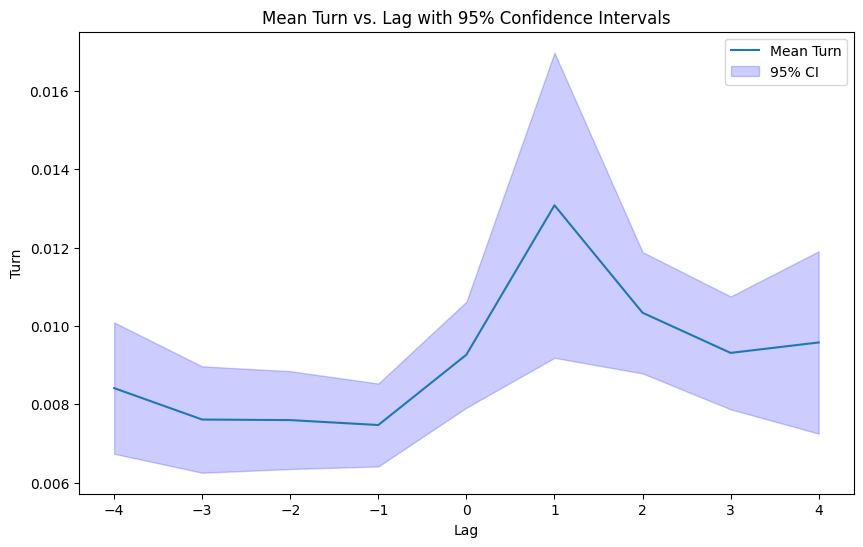

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Assuming 'df' is your DataFrame and it has the columns 'turn' and 'lag'
df['turn'] = df['TR.Volume'] / df['TR.SharesOutstanding']

# Group by 'lag' and calculate the mean and standard error of 'turn'
grouped = df[(df['lag']>-5) & (df['lag']<5)].groupby('lag')['turn'].agg(['mean', 'count', 'std'])
grouped['sem'] = grouped['std'] / np.sqrt(grouped['count'])

# Calculate the 95% confidence intervals
grouped['ci95_hi'] = grouped['mean'] + 1.96 * grouped['sem']
grouped['ci95_lo'] = grouped['mean'] - 1.96 * grouped['sem']

# Check the calculated values
print(grouped.head())

# Plot the mean 'turn' with 95% confidence intervals
plt.figure(figsize=(10, 6))
plt.plot(grouped.index, grouped['mean'], label='Mean Turn')
plt.fill_between(grouped.index, grouped['ci95_lo'], grouped['ci95_hi'], color='b', alpha=0.2, label='95% CI')

# Adding labels and title
plt.xlabel('Lag')
plt.ylabel('Turn')
plt.title('Mean Turn vs. Lag with 95% Confidence Intervals')

# Adding a legend
plt.legend()

# Show the plot
plt.show()